## Importing the required packages

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.metrics import r2_score

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras.backend as K

## Getting the NY times data directly from the Github repo


In [53]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
us = pd.read_csv(url)

In [54]:
(us.head(5))

date  cases  deaths
0  2020-01-21      1       0
1  2020-01-22      1       0
2  2020-01-23      1       0
3  2020-01-24      2       0
4  2020-01-25      3       0

In [56]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'
us_states = pd.read_csv(url)

In [57]:
us_states.head(5)

date       state  fips  cases  deaths
0  2020-01-21  Washington    53      1       0
1  2020-01-22  Washington    53      1       0
2  2020-01-23  Washington    53      1       0
3  2020-01-24    Illinois    17      1       0
4  2020-01-24  Washington    53      1       0

In [59]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
us_counties = pd.read_csv(url)

In [60]:
us_counties.head(5)

date     county       state     fips  cases  deaths
0  2020-01-21  Snohomish  Washington  53061.0      1       0
1  2020-01-22  Snohomish  Washington  53061.0      1       0
2  2020-01-23  Snohomish  Washington  53061.0      1       0
3  2020-01-24       Cook    Illinois  17031.0      1       0
4  2020-01-24  Snohomish  Washington  53061.0      1       0

In [98]:
us['date'] = pd.to_datetime(us['date'])

In [99]:
us.dtypes

date      datetime64[ns]
cases              int64
deaths             int64
dtype: object

In [100]:
us.head()

date  cases  deaths
0 2020-01-21      1       0
1 2020-01-22      1       0
2 2020-01-23      1       0
3 2020-01-24      2       0
4 2020-01-25      3       0

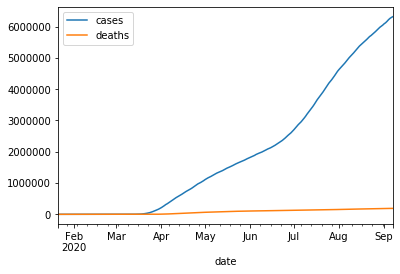

In [101]:
us.plot(x = "date", y = ["cases",'deaths'])

## Testing the data by moving the Date to Index

In [67]:
df_idx = us.set_index(["date"], drop=True)
df_idx.head(5)

cases  deaths
date                     
2020-01-21      1       0
2020-01-22      1       0
2020-01-23      1       0
2020-01-24      2       0
2020-01-25      3       0

In [68]:
df_idx = df_idx.sort_index(axis=1, ascending=True)
df_idx = df_idx.iloc[::-1]

In [69]:
df_idx.head(5)

cases  deaths
date                       
2020-09-07  6317221  189076
2020-09-06  6292054  188815
2020-09-05  6260993  188409
2020-09-04  6218913  187698
2020-09-03  6167443  186718

## Splitting the Data into Train and Test to start the Model Creation 

In [70]:
n = len(us)
train_df = us[0:int(n*0.8)]
test_df = us[int(n*0.8):]

In [103]:
train_df.head()

date  cases  deaths
0 2020-01-21      1       0
1 2020-01-22      1       0
2 2020-01-23      1       0
3 2020-01-24      2       0
4 2020-01-25      3       0

In [102]:
test_df.head()

date    cases  deaths
184 2020-07-23  4049889  144282
185 2020-07-24  4123413  145429
186 2020-07-25  4190189  146312
187 2020-07-26  4244406  146752
188 2020-07-27  4303587  148448

In [72]:
train_df.dtypes

date      datetime64[ns]
cases              int64
deaths             int64
dtype: object

In [104]:
test_df.dtypes

date      datetime64[ns]
cases              int64
deaths             int64
dtype: object

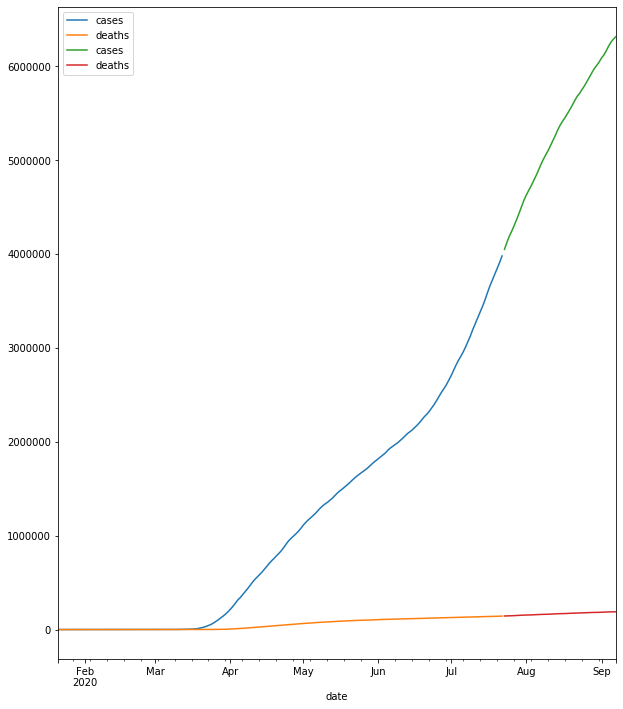

In [105]:
ax = train_df.plot(figsize=(10,12), x = 'date')
test_df.plot(ax=ax, x = 'date')
plt.show()

In [106]:
X_train = pd.DataFrame(train_df[['date','cases']])
y_train = pd.DataFrame(train_df[['deaths']])

In [107]:
X_train.head(10)

date  cases
0 2020-01-21      1
1 2020-01-22      1
2 2020-01-23      1
3 2020-01-24      2
4 2020-01-25      3
5 2020-01-26      5
6 2020-01-27      5
7 2020-01-28      5
8 2020-01-29      5
9 2020-01-30      6

In [108]:
X_test = pd.DataFrame(test_df[['date','cases']])
y_test = pd.DataFrame(test_df[['deaths']])

In [111]:
X_test.head(10)

date    cases
184 2020-07-23  4049889
185 2020-07-24  4123413
186 2020-07-25  4190189
187 2020-07-26  4244406
188 2020-07-27  4303587
189 2020-07-28  4366697
190 2020-07-29  4433312
191 2020-07-30  4502423
192 2020-07-31  4571482
193 2020-08-01  4628303

In [112]:
X_train['year'] = X_train['date'].dt.year 
X_train['month'] = X_train['date'].dt.month 
X_train['day'] = X_train['date'].dt.day 

In [113]:
X_train.head()

date  cases  year  month  day
0 2020-01-21      1  2020      1   21
1 2020-01-22      1  2020      1   22
2 2020-01-23      1  2020      1   23
3 2020-01-24      2  2020      1   24
4 2020-01-25      3  2020      1   25

In [114]:
X_test['year'] = X_test['date'].dt.year 
X_test['month'] = X_test['date'].dt.month 
X_test['day'] = X_test['date'].dt.day 

In [115]:
X_test

date    cases  year  month  day
184 2020-07-23  4049889  2020      7   23
185 2020-07-24  4123413  2020      7   24
186 2020-07-25  4190189  2020      7   25
187 2020-07-26  4244406  2020      7   26
188 2020-07-27  4303587  2020      7   27
189 2020-07-28  4366697  2020      7   28
190 2020-07-29  4433312  2020      7   29
191 2020-07-30  4502423  2020      7   30
192 2020-07-31  4571482  2020      7   31
193 2020-08-01  4628303  2020      8    1
194 2020-08-02  4679096  2020      8    2
195 2020-08-03  4726579  2020      8    3
196 2020-08-04  4780116  2020      8    4
197 2020-08-05  4833837  2020      8    5
198 2020-08-06  4891532  2020      8    6
199 2020-08-07  4952682  2020      8    7
200 2020-08-08  5007922  2020      8    8
201 2020-08-09  5056410  2020      8    9
202 2020-08-10  5103575  2020      8   10
203 2020-08-11  5156920  2020      8   11
204 2020-08-12  5211203  2020      8   12
205 2020-08-13  5265260  2020      8   13
206 2020-08-14  5324737  2020      8   14
207 2020-08-15  5375486  2020      8   15
208 2020-08-16  5417629  2020      8   16
209 2020-08-17  5455136  2020      8   17
210 2020-08-18  5498362  2020      8   18
211 2020-08-19  5541376  2020      8   19
212 2020-08-20  5587401  2020      8   20
213 2020-08-21  5636428  2020      8   21
214 2020-08-22  5681459  2020      8   22
215 2020-08-23  5713799  2020      8   23
216 2020-08-24  5754178  2020      8   24
217 2020-08-25  5793346  2020      8   25
218 2020-08-26  5838125  2020      8   26
219 2020-08-27  5883729  2020      8   27
220 2020-08-28  5930285  2020      8   28
221 2020-08-29  5974924  2020      8   29
222 2020-08-30  6008376  2020      8   30
223 2020-08-31  6044815  2020      8   31
224 2020-09-01  6088842  2020      9    1
225 2020-09-02  6121842  2020      9    2
226 2020-09-03  6167443  2020      9    3
227 2020-09-04  6218913  2020      9    4
228 2020-09-05  6260993  2020      9    5
229 2020-09-06  6292054  2020      9    6
230 2020-09-07  6317221  2020      9    7

## Performing Correlation analysis on the Train and Test Data to see if theres any underlying patterns

In [116]:
X_train.corr()

cases  year     month       day
cases  1.000000   NaN  0.935181 -0.035361
year        NaN   NaN       NaN       NaN
month  0.935181   NaN  1.000000 -0.205110
day   -0.035361   NaN -0.205110  1.000000

In [118]:
X_train.corr(method='spearman')

cases  year     month       day
cases  1.000000   NaN  0.987933 -0.046606
year        NaN   NaN       NaN       NaN
month  0.987933   NaN  1.000000 -0.194633
day   -0.046606   NaN -0.194633  1.000000

In [119]:
X_train.corr(method='kendall')

cases  year     month       day
cases  1.000000   NaN  0.924018  0.017605
year        NaN   1.0       NaN       NaN
month  0.924018   NaN  1.000000 -0.141195
day    0.017605   NaN -0.141195  1.000000

In [120]:
X_test.corr()

cases  year     month       day
cases  1.000000   NaN  0.841558 -0.166813
year        NaN   NaN       NaN       NaN
month  0.841558   NaN  1.000000 -0.669621
day   -0.166813   NaN -0.669621  1.000000

In [121]:
X_test.corr(method='spearman')

cases  year     month       day
cases  1.000000   NaN  0.838482 -0.152823
year        NaN   NaN       NaN       NaN
month  0.838482   NaN  1.000000 -0.662887
day   -0.152823   NaN -0.662887  1.000000

In [122]:
X_test.corr(method='kendall')

cases  year     month       day
cases  1.000000   NaN  0.719106  0.086675
year        NaN   1.0       NaN       NaN
month  0.719106   NaN  1.000000 -0.556002
day    0.086675   NaN -0.556002  1.000000

## Creating a Base model for comparison with Support Vector Regression (SVR)

In [154]:
X_train_2 = X_train.drop('date',1)
X_test_2 = X_test.drop('date',1)

In [155]:
y_test

deaths
184  144282
185  145429
186  146312
187  146752
188  148448
189  149775
190  151170
191  152431
192  153860
193  154915
194  155335
195  155943
196  157299
197  158551
198  159626
199  160982
200  161948
201  162487
202  163024
203  164475
204  165953
205  167166
206  168342
207  169401
208  169915
209  170450
210  171799
211  173094
212  174137
213  175298
214  176248
215  176694
216  177198
217  178411
218  179604
219  180730
220  181740
221  182611
222  182985
223  183473
224  184564
225  185640
226  186718
227  187698
228  188409
229  188815
230  189076

In [161]:
from sklearn.svm import SVR
regressor = SVR(kernel='sigmoid', gamma='scale')

In [162]:
regressor.fit(X_train_2, y_train)
y_pred = regressor.predict(X_test_2)

C:\Users\Ram\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [163]:
y_test

deaths
184  144282
185  145429
186  146312
187  146752
188  148448
189  149775
190  151170
191  152431
192  153860
193  154915
194  155335
195  155943
196  157299
197  158551
198  159626
199  160982
200  161948
201  162487
202  163024
203  164475
204  165953
205  167166
206  168342
207  169401
208  169915
209  170450
210  171799
211  173094
212  174137
213  175298
214  176248
215  176694
216  177198
217  178411
218  179604
219  180730
220  181740
221  182611
222  182985
223  183473
224  184564
225  185640
226  186718
227  187698
228  188409
229  188815
230  189076

In [164]:
y_pred

array([45895.92883604, 45895.81956214, 45895.71896774, 45895.63652198,
       45895.5458898 , 45895.44866256, 45895.34555889, 45895.23825198,
       45895.1308481 , 45895.04245294, 45894.96348532, 45894.88975351,
       45894.80677435, 45894.7237227 , 45894.63481849, 45894.54097766,
       45894.45659614, 45894.38286535, 45894.31147216, 45894.23113716,
       45894.1498657 , 45894.0694349 , 45893.98154583, 45893.90707576,
       45893.8456108 , 45893.79120143, 45893.72884606, 45893.66717536,
       45893.6016132 , 45893.532266  , 45893.46902358, 45893.42387486,
       45893.36782302, 45893.31379404, 45893.25244041, 45893.19041452,
       45893.1275732 , 45893.0677762 , 45893.02325893, 45892.97505381,
       45892.91721058, 45892.87414203, 45892.81503302, 45892.7488811 ,
       45892.69524211, 45892.65590503, 45892.62419167])

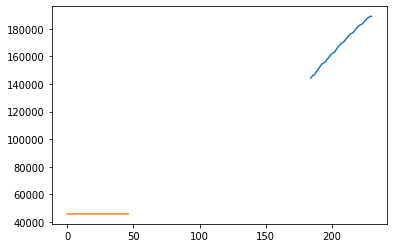

In [165]:
plt.plot(y_test)
plt.plot(y_pred)

In [167]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

r2_test = r2_score(y_test, y_pred)
print("R-squared is: %f"%r2_test)

R-squared is: -81.860927


In [183]:
n = len(us)
train_df = us[0:int(n*0.8)]
test_df = us[int(n*0.8):]

In [185]:
train_df['year'] = train_df['date'].dt.year 
train_df['month'] = train_df['date'].dt.month 
train_df['day'] = train_df['date'].dt.day 

C:\Users\Ram\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ram\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [187]:
test_df['year'] = test_df['date'].dt.year 
test_df['month'] = test_df['date'].dt.month 
test_df['day'] = test_df['date'].dt.day 

C:\Users\Ram\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ram\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Ram\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [188]:
test_df

date    cases  deaths  year  month  day
184 2020-07-23  4049889  144282  2020      7   23
185 2020-07-24  4123413  145429  2020      7   24
186 2020-07-25  4190189  146312  2020      7   25
187 2020-07-26  4244406  146752  2020      7   26
188 2020-07-27  4303587  148448  2020      7   27
189 2020-07-28  4366697  149775  2020      7   28
190 2020-07-29  4433312  151170  2020      7   29
191 2020-07-30  4502423  152431  2020      7   30
192 2020-07-31  4571482  153860  2020      7   31
193 2020-08-01  4628303  154915  2020      8    1
194 2020-08-02  4679096  155335  2020      8    2
195 2020-08-03  4726579  155943  2020      8    3
196 2020-08-04  4780116  157299  2020      8    4
197 2020-08-05  4833837  158551  2020      8    5
198 2020-08-06  4891532  159626  2020      8    6
199 2020-08-07  4952682  160982  2020      8    7
200 2020-08-08  5007922  161948  2020      8    8
201 2020-08-09  5056410  162487  2020      8    9
202 2020-08-10  5103575  163024  2020      8   10
203 2020-08-11  5156920  164475  2020      8   11
204 2020-08-12  5211203  165953  2020      8   12
205 2020-08-13  5265260  167166  2020      8   13
206 2020-08-14  5324737  168342  2020      8   14
207 2020-08-15  5375486  169401  2020      8   15
208 2020-08-16  5417629  169915  2020      8   16
209 2020-08-17  5455136  170450  2020      8   17
210 2020-08-18  5498362  171799  2020      8   18
211 2020-08-19  5541376  173094  2020      8   19
212 2020-08-20  5587401  174137  2020      8   20
213 2020-08-21  5636428  175298  2020      8   21
214 2020-08-22  5681459  176248  2020      8   22
215 2020-08-23  5713799  176694  2020      8   23
216 2020-08-24  5754178  177198  2020      8   24
217 2020-08-25  5793346  178411  2020      8   25
218 2020-08-26  5838125  179604  2020      8   26
219 2020-08-27  5883729  180730  2020      8   27
220 2020-08-28  5930285  181740  2020      8   28
221 2020-08-29  5974924  182611  2020      8   29
222 2020-08-30  6008376  182985  2020      8   30
223 2020-08-31  6044815  183473  2020      8   31
224 2020-09-01  6088842  184564  2020      9    1
225 2020-09-02  6121842  185640  2020      9    2
226 2020-09-03  6167443  186718  2020      9    3
227 2020-09-04  6218913  187698  2020      9    4
228 2020-09-05  6260993  188409  2020      9    5
229 2020-09-06  6292054  188815  2020      9    6
230 2020-09-07  6317221  189076  2020      9    7

In [189]:
del train_df['date']
del test_df['date']

In [192]:
# TODO 
# 3. write comments to help flow of project
# 4. remove the reuse of variables

In [168]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_sc = sc.fit_transform(X_train_2)
test_sc = sc.transform(X_test_2)

In [173]:
train_sc_df = pd.DataFrame(train_sc)
test_sc_df = pd.DataFrame(test_sc)

X_train_3 = train_sc_df.dropna()
y_train_3 = train_sc_df.dropna()

X_test_3 = test_sc_df.dropna()
y_test_3 = test_sc_df.dropna()


In [174]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')

In [178]:
train_sc_df

0    1    2         3
0    0.000000e+00  0.0  0.0  0.666667
1    0.000000e+00  0.0  0.0  0.700000
2    0.000000e+00  0.0  0.0  0.733333
3    2.512636e-07  0.0  0.0  0.766667
4    5.025272e-07  0.0  0.0  0.800000
..            ...  ...  ...       ...
179  9.353835e-01  0.0  1.0  0.566667
180  9.510310e-01  0.0  1.0  0.600000
181  9.660787e-01  0.0  1.0  0.633333
182  9.824776e-01  0.0  1.0  0.666667
183  1.000000e+00  0.0  1.0  0.700000

[184 rows x 4 columns]

In [175]:
regressor.fit(X_train_3, y_train_3)
y_pred = regressor.predict(X_test_3)

ValueError: bad input shape (184, 4)

In [39]:
K.clear_session()
model = Sequential()
model.add(Dense(1, input_shape=(X_test.shape[1],), activation='tanh', kernel_initializer='lecun_uniform'))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=16, epochs=20, verbose=1)


Epoch 1/20
184/184 [==============================] - 0s 1ms/step - loss: 0.6037
Epoch 2/20
184/184 [==============================] - 0s 115us/step - loss: 0.6037
Epoch 3/20
184/184 [==============================] - 0s 149us/step - loss: 0.6037
Epoch 4/20
184/184 [==============================] - 0s 120us/step - loss: 0.6037
Epoch 5/20
184/184 [==============================] - 0s 137us/step - loss: 0.6037
Epoch 6/20
184/184 [==============================] - 0s 110us/step - loss: 0.6037
Epoch 7/20
184/184 [==============================] - 0s 126us/step - loss: 0.6037
Epoch 8/20
184/184 [==============================] - 0s 130us/step - loss: 0.6037
Epoch 9/20
184/184 [==============================] - 0s 132us/step - loss: 0.6037
Epoch 10/20
184/184 [==============================] - 0s 106us/step - loss: 0.6037
Epoch 11/20
184/184 [==============================] - 0s 121us/step - loss: 0.6037
Epoch 12/20
184/184 [==============================] - 0s 130us/step - loss: 0.6037
Ep

R-Squared: -3.943170


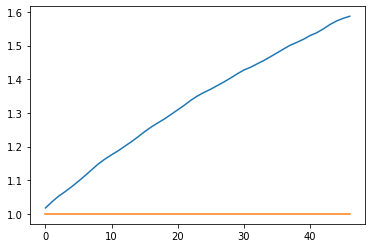

In [40]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

In [41]:
type(X_train)

numpy.ndarray

In [46]:
K.clear_session()
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
model.add(Dense(5, input_shape=(X_test.shape[1],), activation='tanh'))
model.add(Dense(2, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(2, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=5, epochs=50, verbose=1)

Epoch 1/50
184/184 [==============================] - 0s 2ms/step - loss: 0.1530
Epoch 2/50
184/184 [==============================] - 0s 596us/step - loss: 0.1367
Epoch 3/50
184/184 [==============================] - 0s 633us/step - loss: 0.1239
Epoch 4/50
184/184 [==============================] - 0s 553us/step - loss: 0.1134
Epoch 5/50
184/184 [==============================] - 0s 544us/step - loss: 0.1058
Epoch 6/50
184/184 [==============================] - 0s 548us/step - loss: 0.0996
Epoch 7/50
184/184 [==============================] - 0s 542us/step - loss: 0.0951
Epoch 8/50
184/184 [==============================] - 0s 535us/step - loss: 0.0918
Epoch 9/50
184/184 [==============================] - 0s 538us/step - loss: 0.0893
Epoch 10/50
184/184 [==============================] - 0s 565us/step - loss: 0.0876
Epoch 11/50
184/184 [==============================] - 0s 544us/step - loss: 0.0864
Epoch 12/50
184/184 [==============================] - 0s 578us/step - loss: 0.0856
Epo

R-Squared: -39.688903


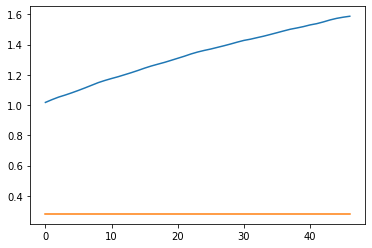

In [47]:
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))